In [1]:
# This code provides a solution for the most efficient route for politician to travel in order to visit all fifty state capitals, starting in Iowa and ending in DC.
# The shortest route is found through using geopy to calculate the distance between the capital's longitude and latitude coordinates, and itertools permutations to generate different route combinations.
# Due to the amount of locations, the capitals have to be grouped into clusters to avoid the system overloading from the amount of permutations all 50 states would create if calculated as one group.
# The first cluster's route must start in Iowa, and the last cluster's route must end in DC. 
# All other cluster's will be linked together by adding conditions to make the cluster route beginning with whatever location the previous cluster's route ended with.
# Once the minimum routes are found for each cluster the total distances of those routes will be added together and the systen will output the total distance and the shortest route for the politician to travel.
import pandas as pd # import pandas to read and manipulate csv file
import matplotlib.pyplot as plt #import matplotlib to create scatter plot
from sklearn.cluster import KMeans #import sklearn to location on scatter plot into cluster (you may have to import as scikit to get it to install correcting.
import folium #import folium to create interactive map of the USA to act as a visual aid for ease of development
import itertools # import itertools to help create permutation of different possible routes
from geopy.distance import geodesic #import geopy to calculate distances between different longitudes and latitudes

In [2]:
# Add CSV file
capitals = pd.read_csv(r"C:\Users\lmhmo\PycharmProjects\Traveling_Politcian\.venv\us-state-capitals.csv") #Read CSV file(If you keep getting an error saying "File not found in directory" you may have to include the entire path for the csv file instead of just writing "us-state-capitals.csv")
print(capitals) #Print CSV file to make sure all that the names of every USA capital and their state are available, along with its longitude and latitude.

              name            city   latitude   longitude  zipcode
0          Alabama      Montgomery  32.377716  -86.300568    36101
1           Alaska          Juneau  58.301598 -134.420212    99801
2          Arizona         Phoenix  33.448143 -112.096962    85001
3         Arkansas     Little Rock  34.746613  -92.288986    72201
4       California      Sacramento  38.576668 -121.493629    94203
5         Colorado          Denver  39.739227 -104.984856    80201
6      Connecticut    Hartford<br>  41.764046  -72.682198     6101
7         Delaware           Dover  39.157307  -75.519722    19901
8              DC       Washington  38.895000  -77.036600    20500
9           Hawaii        Honolulu  21.307442 -157.857376    32301
10         Florida     Tallahassee  30.438118  -84.281296    30301
11         Georgia     Atlanta<br>  33.749027  -84.388229    96801
12           Idaho           Boise  43.617775 -116.199722    83702
13        Illinois     Springfield  39.798363  -89.654961    6

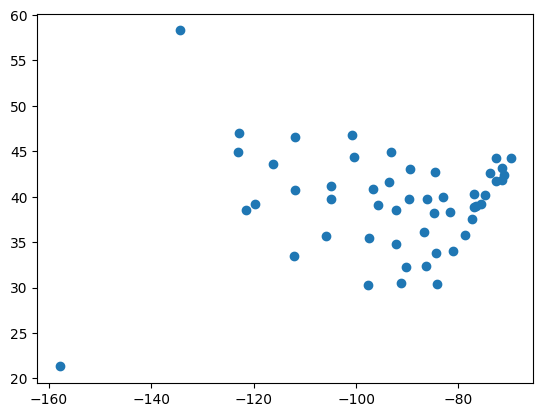

In [3]:
#Use matplotlib to create a scatter plot that maps the location of every capital.
plt.scatter(capitals['longitude'], capitals['latitude']) #Use longitude and latitude data to place capitals in proper locations on scatter plot.
plt.show() #display plot

In [4]:
#Use Kmeans to create clusters
# Create a KMeans instance with the desired number of clusters and n_init
kmeans = KMeans(n_clusters=14, n_init=5, random_state=42) #n_clusters = numbers of clusters you want to create, n-init = desired numbers of capitals in each clusters, random state will ensure that the program allow breaks up the cluster into the same groups, regardless of how many times the program will run.
# Fit the model to the longitude and latitude data
kmeans.fit(capitals[['longitude', 'latitude']]) # Run k-means clustering on the capitals' coordinates and assign them to clusters
# Predict the cluster for each data point
capitals['cluster'] = kmeans.predict(capitals[['longitude', 'latitude']])# Assign cluster labels to the capitals based on their coordinates

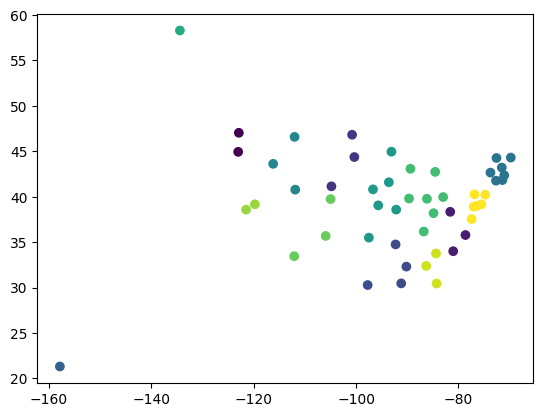

In [5]:
#Create new scatter plot using Matplotlib to show the clusters that were created by Kmeans 
plt.scatter(capitals['longitude'], capitals['latitude'], c=capitals['cluster']) #Use longitude and latitude data to place capitals in proper locations on scatter plot.
plt.show() #display scatter plot

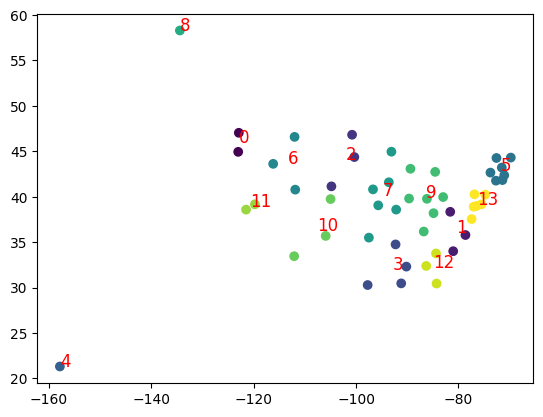

In [6]:
# Update scatter plot so that each cluster corresponds to a number
plt.scatter(capitals['longitude'], capitals['latitude'], c=capitals['cluster']) #create new scatter plot still using the coordinates data.
centers = kmeans.cluster_centers_# Calculate the cluster centers
# Loop through the cluster centers
for i, center in enumerate(centers):
    # Annotate the plot with the cluster numbers at the cluster centers
    plt.annotate(i, (center[0], center[1]), fontsize=12, color='red')
plt.show() #display plot

In [7]:
# Create an interactive map as a visual aid for ease of development using folium.
# Create a new map object using the folium.Map() function
map = folium.Map(location=[capitals['latitude'].mean(), capitals['longitude'].mean()], zoom_start=4)# Create a new map object using the folium.Map() function
# The location argument sets the initial center of the map to the mean latitude and longitude of the capitals
# The zoom_start argument sets the initial zoom level of the map to 4
# Define a color palette for 10 groups
colors = ['red', 'blue', 'green', 'purple', 'orange', 'darkred', 'lightblue', 'pink', 'gray', 'black', "yellow","pink","darkred","darkblue","darkgreen"] #If you increase the amount of clusters you want in this code "kmeans = KMeans(n_clusters=14, n_init=5, random_state=42)", you will have to add more colors to this list.
# Add markers to the map
for _, row in capitals.iterrows(): # Get the color corresponding to the cluster value
    color = colors[row['cluster']] # Get the color corresponding to the cluster value
     # Create a circle marker object with the given parameters
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],# Set the location as the latitude and longitude values
        radius=5,# Set the radius as 5 pixels
        color=color,# Set the border color as the cluster color
        # Fill the circle with the cluster color
        fill=True,
        fill_color=color,
        tooltip=f"{row['name']} (Cluster {row['cluster']})" #this creates a hover effect that allows you to see the name of a state and what cluster it belongs to.
        # Add the circle marker to the map object
    ).add_to(map)

# Display the map
map

In [8]:
clusters = {} #create a dictionary of all of the different clusters
# Loop over the rows in the DataFrame
for _, row in capitals.iterrows():
    # If the cluster is not in the dictionary, add it
    if row['cluster'] not in clusters:
        clusters[row['cluster']] = []
    # Add the name and description of the location to the cluster
    clusters[row['cluster']].append({'name': row['name'], "latitude": row['latitude'], 'longitude': row['longitude']})
# Get the cluster numbers in sorted order
sorted_clusters = sorted(clusters.keys())   
# Print the clusters and their locations in sorted order
for cluster in sorted_clusters:
    print(f"Cluster {cluster}:")
    for location in clusters[cluster]:
        print(f"{location['name']}: {location['latitude']},{location['longitude']}'")

Cluster 0:
Oregon: 44.938461,-123.030403'
Washington: 47.035805,-122.905014'
Cluster 1:
North Carolina: 35.78043,-78.639099'
South Carolina: 34.000343,-81.033211'
West Virginia: 38.336246,-81.612328'
Cluster 2:
North Dakota: 46.82085,-100.783318'
South Dakota: 44.367031,-100.346405'
Wyoming: 41.140259,-104.820236'
Cluster 3:
Arkansas: 34.746613,-92.288986'
Louisiana: 30.457069,-91.187393'
Mississippi: 32.303848,-90.182106'
Texas: 30.27467,-97.740349'
Cluster 4:
Hawaii: 21.307442,-157.857376'
Cluster 5:
Connecticut: 41.764046,-72.682198'
Maine: 44.307167,-69.781693'
Massachusetts: 42.358162,-71.063698'
New Hampshire: 43.206898,-71.537994'
New York: 42.652843,-73.757874'
Rhode Island: 41.830914,-71.414963'
Vermont: 44.262436,-72.580536'
Cluster 6:
Idaho: 43.617775,-116.199722'
Montana: 46.585709,-112.018417'
Utah: 40.777477,-111.888237'
Cluster 7:
Iowa: 41.591087,-93.603729'
Kansas: 39.048191,-95.677956'
Minnesota: 44.955097,-93.102211'
Missouri: 38.579201,-92.172935'
Nebraska: 40.808075

In [9]:
#This section of code will calculate all the possible permutations with the condition that Iowa will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 7 to a variable
cluster_7 = clusters[7]
# Define the name of the starting location
start_location_name = 'Iowa'
# Find the dictionary that matches the name of the starting location in cluster 7
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_7 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 7
    print(f"No location named {start_location_name} found in cluster_7")
else:
    # If no, remove the dictionary of the starting location from cluster 7
    cluster_7 = [d for d in cluster_7 if d["name"] != start_location_name]
    # Generate all possible permutations of the remaining locations in cluster 7
    routes = list(itertools.permutations(cluster_7))
    # Add the starting location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]

# Initialize an empty list to store the distances of each route
distances = []
# Loop through each route in routes
for route in routes:
    # Initialize a variable to store the total distance of the current route
    total_distance = 0
    # Loop through each pair of consecutive locations in the route
    for i in range(len(route) - 1):
        # Assign the first location to location1
        location1 = route[i]
        # Assign the second location to location2
        location2 = route[i+1]
        # Calculate the distance between location1 and location2 using geodesic function
        # The function takes the latitude and longitude of each location as arguments
        # The function returns the distance in miles
        distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                            (location2['latitude'], location2['longitude'])).miles 
        # Add the distance to the total distance of the current route
        total_distance += distance
    # Append the total distance of the current route to the distances list
    distances.append(total_distance)
# Find the minimum distance in the distances list
min_distance7 = min(distances) 

# Find the route that corresponds to the minimum distance
min_route7 = routes[distances.index(min_distance7)]

# Print the names of the locations in the shortest route and the total distance
print(f"Shortest Route: {[location['name'] for location in min_route7]}, Total Distance: {min_distance7:.2f} miles") # your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance7 and min_route7, don't request routes or distance.

Shortest Route: ['Iowa', 'Minnesota', 'Nebraska', 'Kansas', 'Missouri', 'Oklahoma'], Total Distance: 1261.38 miles


In [10]:
#This section of code will calculate all the possible permutations with the condition that last_state_7 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 7 to a variable
cluster_7 = clusters[7]
# Assign the list of dictionaries representing locations in cluster 2 to a variable
cluster_2 = clusters[2]
# Assign the last location in the shortest route of cluster 7 to a variable
last_state_7 = min_route7[-1] #This variable will act as the connector for the route that was calculated for cluster_7 and the route that will be found for cluster_2
# Assign the name of the last location to a variable
start_location_name = last_state_7['name']

# Find the dictionary that matches the name of the last location in cluster 2
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_7 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 7
    print(f"No location named {start_location_name} found in cluster_7")
else:
    # If no, add the dictionary of the last location to cluster 2
    cluster_2.append(start_location)
    # Create a copy of cluster 2 without the last location for generating the permutations
    cluster_2_without_start = [location for location in cluster_2 if location["name"] != start_location_name]
    # Generate all possible permutations of the locations in cluster 2 without the last location
    routes = list(itertools.permutations(cluster_2_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]    
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]

            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance2 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route2 = routes[distances.index(min_distance2)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route2]}, Total Distance: {min_distance2:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance2 and min_route2, don't request routes or distance.

Shortest Route: ['Oklahoma', 'Wyoming', 'South Dakota', 'North Dakota'], Total Distance: 1045.37 miles


In [11]:
#This section of code will calculate all the possible permutations with the condition that last_state_2 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 2 to a variable
cluster_2 = clusters[2]
# Assign the list of dictionaries representing locations in cluster 6 to a variable
cluster_6 = clusters[6]
# Assign the last location in the shortest route of cluster 2 to a variable
last_state_2 = min_route2[-1] #This variable will act as the connector for the route that was calculated for cluster_2 and the route that will be found for cluster_6
# Assign the name of the last location to a variable
start_location_name = last_state_2['name']

# Find the dictionary that matches the name of the last location in cluster 2
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_2 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 2
    print(f"No location named {start_location_name} found in cluster_2")
else:
    # If no, add the dictionary of the last location to cluster 6
    cluster_6.append(start_location)
    # Create a copy of cluster 6 without the last location for generating the permutations
    cluster_6_without_start = [location for location in cluster_6 if location["name"] != start_location_name]
    # Generate all possible permutations of the locations in cluster 6 without the last location
    routes = list(itertools.permutations(cluster_6_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]  
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance6 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route6 = routes[distances.index(min_distance6)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route6]}, Total Distance: {min_distance6:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance6 and min_route6, don't request routes or distance.

Shortest Route: ['North Dakota', 'Montana', 'Idaho', 'Utah'], Total Distance: 1118.67 miles


In [12]:
#This section of code will calculate all the possible permutations with the condition that last_state_6 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 6 to a variable
cluster_6 = clusters[6]
# Assign the list of dictionaries representing locations in cluster 8 to a variable
cluster_8 = clusters[8]
# Assign the last location in the shortest route of cluster 6 to a variable
last_state_6 = min_route6[-1] #This variable will act as the connector for the route that was calculated for cluster_6 and the route that will be found for cluster_8
# Assign the name of the last location to a variable
start_location_name = last_state_6['name']
# Find the dictionary that matches the name of the last location in cluster 6
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_6 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 6
    print(f"No location named {start_location_name} found in cluster_6")
else:
    # If no, remove the dictionary of the last location from cluster 8 if it's already there
    cluster_8 = [location for location in cluster_8 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 8
    cluster_8.append(start_location)
    # Create a copy of cluster 8 without the last location for generating the permutations
    cluster_8_without_start = [location for location in cluster_8 if location["name"] != start_location_name]
    # Generate all possible permutations of the locations in cluster 8 without the last location
    routes = list(itertools.permutations(cluster_8_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]    
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance8 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route8 = routes[distances.index(min_distance8)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route8]}, Total Distance: {min_distance8:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance8 and min_route8, don't request routes or distance.


Shortest Route: ['Utah', 'Alaska'], Total Distance: 1563.53 miles


In [13]:
#This section of code will calculate all the possible permutations with the condition that last_state_8 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 8 to a variable
cluster_8 = clusters[8]
# Assign the list of dictionaries representing locations in cluster 0 to a variable
cluster_0 = clusters[0]
# Assign the last location in the shortest route of cluster 8 to a variable
last_state_8 = min_route8[-1] #This variable will act as the connector for the route that was calculated for cluster_8 and the route that will be found for cluster_0
# Assign the name of the last location to a variable
start_location_name = last_state_8['name']
# Find the dictionary that matches the name of the last location in cluster 8
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_8 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 8
    print(f"No location named {start_location_name} found in cluster_8")
else:
    # If no, remove the dictionary of the last location from cluster 0 if it's already there
    cluster_0 = [location for location in cluster_0 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 0
    cluster_0.append(start_location)
    # Create a copy of cluster 0 without the last location for generating the permutations
    cluster_0_without_start = [location for location in cluster_0 if location["name"] != start_location_name]   
    # Generate all possible permutations of the locations in cluster 0 without the last location
    routes = list(itertools.permutations(cluster_0_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]    
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance0 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route0 = routes[distances.index(min_distance0)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route0]}, Total Distance: {min_distance0:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance0 and min_route0, don't request routes or distance.


Shortest Route: ['Alaska', 'Washington', 'Oregon'], Total Distance: 1059.29 miles


In [14]:
#This section of code will calculate all the possible permutations with the condition that last_state_0 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

cluster_0 = clusters[0]
# Assign the list of dictionaries representing locations in cluster 11 to a variable
cluster_11 = clusters[11]
# Assign the last location in the shortest route of cluster 0 to a variable
last_state_0 = min_route0[-1] #This variable will act as the connector for the route that was calculated for cluster_0 and the route that will be found for cluster_11
# Assign the name of the last location to a variable
start_location_name = last_state_0['name']

# Find the dictionary that matches the name of the last location in cluster 0
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_0 if d["name"] == start_location_name), None)

# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 0
    print(f"No location named {start_location_name} found in cluster_0")
else:
    # If no, remove the dictionary of the last location from cluster 11 if it's already there
    cluster_11 = [location for location in cluster_11 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 11
    cluster_11.append(start_location)
    # Create a copy of cluster 11 without the last location for generating the permutations
    cluster_11_without_start = [location for location in cluster_11 if location["name"] != start_location_name]   
    # Generate all possible permutations of the locations in cluster 11 without the last location
    routes = list(itertools.permutations(cluster_11_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]  
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance11 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route11 = routes[distances.index(min_distance11)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route11]}, Total Distance: {min_distance11:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance11 and min_route11, don't request routes or distance.

Shortest Route: ['Oregon', 'Nevada', 'California'], Total Distance: 533.96 miles


In [15]:
#This section of code will calculate all the possible permutations with the condition that last_state_11 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 11 to a variable
cluster_11 = clusters[11]
# Assign the list of dictionaries representing locations in cluster 4 to a variable
cluster_4 = clusters[4]
# Assign the last location in the shortest route of cluster 11 to a variable
last_state_11 = min_route11[-1] #This variable will act as the connector for the route that was calculated for cluster_11 and the route that will be found for cluster_4
# Assign the name of the last location to a variable
start_location_name = last_state_11['name']
# Find the dictionary that matches the name of the last location in cluster 11
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_11 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 11
    print(f"No location named {start_location_name} found in cluster_11")
else:
    # If no, remove the dictionary of the last location from cluster 4 if it's already there
    cluster_4 = [location for location in cluster_4 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 4
    cluster_4.append(start_location)
    # Create a copy of cluster 4 without the last location for generating the permutations
    cluster_4_without_start = [location for location in cluster_4 if location["name"] != start_location_name]
    # Generate all possible permutations of the locations in cluster 4 without the last location
    routes = list(itertools.permutations(cluster_4_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]  
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance4 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route4 = routes[distances.index(min_distance4)]

    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route4]}, Total Distance: {min_distance4:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance4 and min_route4, don't request routes or distance.


Shortest Route: ['California', 'Hawaii'], Total Distance: 2461.71 miles


In [16]:
#This section of code will calculate all the possible permutations with the condition that last_state_4 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 4 to a variable
cluster_4 = clusters[4]
# Assign the list of dictionaries representing locations in cluster 10 to a variable
cluster_10 = clusters[10]
# Assign the last location in the shortest route of cluster 4 to a variable
last_state_4 = min_route4[-1] #This variable will act as the connector for the route that was calculated for cluster_4 and the route that will be found for cluster_10
# Assign the name of the last location to a variable
start_location_name = last_state_4['name']
# Find the dictionary that matches the name of the last location in cluster 4
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_4 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 4
    print(f"No location named {start_location_name} found in cluster_4")
else:
    # If no, remove the dictionary of the last location from cluster 10 if it's already there
    cluster_10 = [location for location in cluster_10 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 10
    cluster_10.append(start_location)
    # Create a copy of cluster 10 without the last location for generating the permutations
    cluster_10_without_start = [location for location in cluster_10 if location["name"] != start_location_name]  
    # Generate all possible permutations of the locations in cluster 10 without the last location
    routes = list(itertools.permutations(cluster_10_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]  
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles

            # Add the distance to the total distance of the current route
            total_distance += distance

        # Append the total distance of the current route to the distances list
        distances.append(total_distance)

    # Find the minimum distance in the distances list
    min_distance10 = min(distances)

    # Find the route that corresponds to the minimum distance
    min_route10 = routes[distances.index(min_distance10)]

    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route10]}, Total Distance: {min_distance10:.2f} miles")
 # your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance10 and min_route10, don't request routes or distance.

Shortest Route: ['Hawaii', 'Arizona', 'New Mexico', 'Colorado'], Total Distance: 3577.05 miles


In [17]:
#This section of code will calculate all the possible permutations with the condition that last_state_10 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 10 to a variable
cluster_10 = clusters[10]
# Assign the list of dictionaries representing locations in cluster 3 to a variable
cluster_3 = clusters[3]
# Assign the last location in the shortest route of cluster 10 to a variable
last_state_10 = min_route10[-1] #This variable will act as the connector for the route that was calculated for cluster_10 and the route that will be found for cluster_3
# Assign the name of the last location to a variable
start_location_name = last_state_10['name']
# Find the dictionary that matches the name of the last location in cluster 10
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_10 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 10
    print(f"No location named {start_location_name} found in cluster_10")
else:
    # If no, remove the dictionary of the last location from cluster 3 if it's already there
    cluster_3 = [location for location in cluster_3 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 3
    cluster_3.append(start_location)
    # Create a copy of cluster 3 without the last location for generating the permutations
    cluster_3_without_start = [location for location in cluster_3 if location["name"] != start_location_name]   
    # Generate all possible permutations of the locations in cluster 3 without the last location
    routes = list(itertools.permutations(cluster_3_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]
    
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance3 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route3 = routes[distances.index(min_distance3)]

    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route3]}, Total Distance: {min_distance3:.2f} miles")
 # your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance3 and min_route3, don't request routes or distance.

Shortest Route: ['Colorado', 'Texas', 'Louisiana', 'Mississippi', 'Arkansas'], Total Distance: 1510.06 miles


In [18]:
#This section of code will calculate all the possible permutations with the condition that last_state_3 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 3 to a variable
cluster_3 = clusters[3]
# Assign the list of dictionaries representing locations in cluster 12 to a variable
cluster_12 = clusters[12]
# Assign the last location in the shortest route of cluster 3 to a variable
last_state_3 = min_route3[-1] #This variable will act as the connector for the route that was calculated for cluster_3 and the route that will be found for cluster_12
# Assign the name of the last location to a variable
start_location_name = last_state_3['name']
# Find the dictionary that matches the name of the last location in cluster 3
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_3 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 3
    print(f"No location named {start_location_name} found in cluster_3")
else:
    # If no, remove the dictionary of the last location from cluster 12 if it's already there
    cluster_12 = [location for location in cluster_12 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 12
    cluster_12.append(start_location)
    # Create a copy of cluster 12 without the last location for generating the permutations
    cluster_12_without_start = [location for location in cluster_12 if location["name"] != start_location_name]  
    # Generate all possible permutations of the locations in cluster 12 without the last location
    routes = list(itertools.permutations(cluster_12_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]    
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance12 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route12 = routes[distances.index(min_distance12)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route12]}, Total Distance: {min_distance12:.2f} miles") # your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance12 and min_route12, don't request routes or distance.

Shortest Route: ['Arkansas', 'Alabama', 'Georgia', 'Florida'], Total Distance: 756.02 miles


In [19]:
#This section of code will calculate all the possible permutations with the condition that last_state_12 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 12 to a variable
cluster_12 = clusters[12]
# Assign the list of dictionaries representing locations in cluster 1 to a variable
cluster_1 = clusters[1]
# Assign the last location in the shortest route of cluster 12 to a variable
last_state_12 = min_route12[-1] #This variable will act as the connector for the route that was calculated for cluster_12 and the route that will be found for cluster_1
# Assign the name of the last location to a variable
start_location_name = last_state_12['name']
# Find the dictionary that matches the name of the last location in cluster 12
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_12 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 12
    print(f"No location named {start_location_name} found in cluster_12")
else:
    # If no, remove the dictionary of the last location from cluster 1 if it's already there
    cluster_1 = [location for location in cluster_1 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 1
    cluster_1.append(start_location)
    # Create a copy of cluster 1 without the last location for generating the permutations
    cluster_1_without_start = [location for location in cluster_1 if location["name"] != start_location_name]   
    # Generate all possible permutations of the locations in cluster 1 without the last location
    routes = list(itertools.permutations(cluster_1_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes] 
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance1 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route1 = routes[distances.index(min_distance1)]

    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route1]}, Total Distance: {min_distance1:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance1 and min_route1, don't request routes or distance.
    

Shortest Route: ['Florida', 'South Carolina', 'North Carolina', 'West Virginia'], Total Distance: 734.60 miles


In [20]:
#This section of code will calculate all the possible permutations with the condition that last_state_1 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 1 to a variable
cluster_1 = clusters[1]
# Assign the list of dictionaries representing locations in cluster 9 to a variable
cluster_9 = clusters[9]
# Assign the last location in the shortest route of cluster 1 to a variable
last_state_1 = min_route1[-1] #This variable will act as the connector for the route that was calculated for cluster_1 and the route that will be found for cluster_9
# Assign the name of the last location to a variable
start_location_name = last_state_1['name']
# Find the dictionary that matches the name of the last location in cluster 1
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_1 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 1
    print(f"No location named {start_location_name} found in cluster_1")
else:
    # If no, remove the dictionary of the last location from cluster 9 if it's already there
    cluster_9 = [location for location in cluster_9 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 9
    cluster_9.append(start_location)
    # Create a copy of cluster 9 without the last location for generating the permutations
    cluster_9_without_start = [location for location in cluster_9 if location["name"] != start_location_name]
    # Generate all possible permutations of the locations in cluster 9 without the last location
    routes = list(itertools.permutations(cluster_9_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]  
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance9 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route9 = routes[distances.index(min_distance9)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route9]}, Total Distance: {min_distance9:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance9 and min_route9, don't request routes or distance.

Shortest Route: ['West Virginia', 'Ohio', 'Michigan', 'Wisconsin', 'Illinois', 'Indiana', 'Kentucky', 'Tennessee'], Total Distance: 1304.84 miles


In [21]:
#This section of code will calculate all the possible permutations with the condition that last_state_9 will be the start location of permutation
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries representing locations in cluster 9 to a variable
cluster_9 = clusters[9]
# Assign the list of dictionaries representing locations in cluster 5 to a variable
cluster_5 = clusters[5]
# Assign the last location in the shortest route of cluster 9 to a variable
last_state_9 = min_route9[-1] #This variable will act as the connector for the route that was calculated for cluster_9 and the route that will be found for cluster_9
# Assign the name of the last location to a variable
start_location_name = last_state_9['name']
# Find the dictionary that matches the name of the last location in cluster 9
# If no match is found, assign None to start_location
start_location = next((d for d in cluster_9 if d["name"] == start_location_name), None)
# Check if start_location is None
if start_location is None:
    # If yes, print a message indicating that the name is not found in cluster 9
    print(f"No location named {start_location_name} found in cluster_9")
else:
    # If no, remove the dictionary of the last location from cluster 5 if it's already there
    cluster_5 = [location for location in cluster_5 if location["name"] != start_location_name]
    # Add the dictionary of the last location to cluster 5
    cluster_5.append(start_location)
    # Create a copy of cluster 5 without the last location for generating the permutations
    cluster_5_without_start = [location for location in cluster_5 if location["name"] != start_location_name]    
    # Generate all possible permutations of the locations in cluster 5 without the last location
    routes = list(itertools.permutations(cluster_5_without_start))
    # Add the last location to the beginning of each permutation
    routes = [(start_location,) + route for route in routes]    
    # Initialize an empty list to store the distances of each route
    distances = []
    # Loop through each route in routes
    for route in routes:
        # Initialize a variable to store the total distance of the current route
        total_distance = 0
        # Loop through each pair of consecutive locations in the route
        for i in range(len(route) - 1):
            # Assign the first location to location1
            location1 = route[i]
            # Assign the second location to location2
            location2 = route[i + 1]
            # Calculate the distance between location1 and location2 using geodesic function
            # The function takes the latitude and longitude of each location as arguments
            # The function returns the distance in miles
            distance = geodesic((location1['latitude'], location1['longitude']),# I received alot of string errors on this line of code, to avoid this ensure that the "routes" is defined before the distance function.
                                (location2['latitude'], location2['longitude'])).miles
            # Add the distance to the total distance of the current route
            total_distance += distance
        # Append the total distance of the current route to the distances list
        distances.append(total_distance)
    # Find the minimum distance in the distances list
    min_distance5 = min(distances)
    # Find the route that corresponds to the minimum distance
    min_route5 = routes[distances.index(min_distance5)]
    # Print the names of the locations in the shortest route and the total distance
    print(f"Shortest Route: {[location['name'] for location in min_route5]}, Total Distance: {min_distance5:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance5 and min_route5, don't request routes or distance.
    

Shortest Route: ['Tennessee', 'New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Vermont', 'Maine'], Total Distance: 1307.52 miles


In [22]:
#This section of code will calculate all the possible permutations with the condition that last_state_5 will be the start location of permutation and DC will be the last location
# This section will use itertools permutations and geodesic from geopy.distance

# Assign the list of dictionaries in clusters[5] to cluster_5
cluster_5 = clusters[5]
# Assign the list of dictionaries in clusters[13] to cluster_13
cluster_13 = clusters[13]
# Get the last location in the shortest route of cluster_5 and assign it to last_state_5
last_state_5 = min_route5[-1] #This variable will act as the connector for the route that was calculated for cluster_5 and the route that will be found for cluster_13
# Get the name of the last location and assign it to start_location_name
start_location_name = last_state_5['name']
# Get the second location in cluster_13 and assign it to end_location_name
end_location_name = cluster_13[1] #Define end location 
# Get the name of the second location and assign it to end_location_name
end_location_name = end_location_name['name']
# Find the dictionary in cluster_5 that has the name of the last location and assign it to start_location
# If there is no such dictionary, assign None to start_location
start_location = next((d for d in cluster_5 if d["name"] == start_location_name), None) #Pull location by name from cluster
# Find the dictionary in cluster_13 that has the name of the second location and assign it to end_location
# If there is no such dictionary, assign None to end_location
end_location = next((d for d in cluster_13 if d["name"] == end_location_name), None) #Pull location by name from cluster
# Check if start_location is None
if start_location is None:
    # If yes, print a message that there is no location named start_location_name in cluster_13
    print(f"No location named {start_location_name} found in cluster_13")
# Otherwise
else:
    # Create a new list of dictionaries from cluster_13 that excludes the start location
    cluster_13 = [location for location in cluster_13 if location["name"] != start_location_name]
# Add the start location to cluster_13
cluster_13.append(start_location) #remove start_location_name
# Create a copy of cluster_13 without the start_location for generating the permutations
cluster_13_without_start = [location for location in cluster_13 if location["name"] != start_location_name] #create list without start_location name
# Find the dictionary in cluster_13 that has the name "DC" and assign it to dc_location
dc_location = next((d for d in cluster_13 if d["name"] == "DC"), None) #Find DC
# Create a list of all possible permutations of the dictionaries in cluster_13_without_start
routes = list(itertools.permutations(cluster_13_without_start)) #create permutations without start
# Add the start location as the first element of each permutation
routes = [(start_location,) + route for route in routes] #add start location as beginning of all permutations
# Add the dc_location as the last element of each permutation
routes = [route + (dc_location,) for route in routes] #add end location to the end of all permutations
# Check if end_location is None
if end_location is None:
    # If yes, print a message that there is no location named end_location_name in cluster_13
    print(f"No location named {end_location_name} found in cluster_13")
# Otherwise
else:
    # Create a new list of dictionaries from cluster_13 that excludes the end location
    cluster_13 = [location for location in cluster_13 if location["name"] != end_location_name]
    # Add the end location to cluster_13
    cluster_13.append(end_location)
    # Create a copy of cluster_13 without the end_location for generating the permutations
    cluster_13_without_end = [location for location in cluster_13 if location["name"] != end_location_name]
    # Create a list of all possible permutations of the dictionaries in cluster_13_without_end
    routes = list(itertools.permutations(cluster_13_without_end))
    # Add the end location as the last element of each permutation
    routes = [route + (end_location,) for route in routes]
# Initialize an empty list to store the distances of each route
distances = []
# Loop through each route in routes
for route in routes:
    # Initialize a variable to store the total distance of the route
    total_distance = 0
    # Loop through each pair of consecutive locations in the route
    for i in range(len(route) - 1):
        # Assign the first location to location1
        location1 = route[i]
        # Assign the second location to location2
        location2 = route[i + 1]
        # Calculate the geodesic distance between the two locations in miles
        distance = geodesic((location1['latitude'], location1['longitude']),
                            (location2['latitude'], location2['longitude'])).miles
        # Add the distance to the total distance of the route
        total_distance += distance
    # Append the total distance of the route to the distances list
    distances.append(total_distance)
# Find the minimum distance in the distances list
min_distance13 = min(distances)

# Define and assign a value to min_route13 in the global scope
min_route13 = routes[distances.index(min_distance13)]
# Print the names of the locations in the shortest route and the total distance

print(f"Shortest Route: {[location['name'] for location in min_route13]}, Total Distance: {min_distance13:.2f} miles")# your system can overload really easily when running permutations, try to make your print request as specifc as possible to avoid it outputting too many permutations. Make sure to only request min_distance5 and min_route5, don't request routes or distance.

Shortest Route: ['Maine', 'New Jersey', 'Pennsylvania', 'Delaware', 'Maryland', 'Virginia', 'DC '], Total Distance: 859.23 miles


In [23]:
# This section will calcute the total distance and output the route the politician must travel
# Calculate the total distance of all the shortest routes of each cluster
total_distance = (min_distance0 + min_distance1 +min_distance2 +min_distance3 +min_distance4 +min_distance5 + min_distance6 + min_distance7 + min_distance8 + min_distance9 + min_distance10 + min_distance11 + min_distance12 + min_distance13)


# Print the total distance and the starting and ending points of the journey
print(f"The Politician will have to travel a total of {total_distance:.2f} miles to visit every state capital while traveling from Iowa to DC. \n")

print("Politcian's Complete Campaign Route\n")
# Print the names of the locations in the shortest route of each cluster
# Cluster 1 corresponds to cluster 7 in the original clustering
# Cluster 1 corresponds to cluster 7 in the original clustering
print(f"{[location['name'] for location in min_route7]}")

# Cluster 2 corresponds to cluster 2 in the original clustering
print(f"{[location['name'] for location in min_route2][1:]}")

# Cluster 3 corresponds to cluster 6 in the original clustering
print(f"{[location['name'] for location in min_route6][1:]}")

# Cluster 4 corresponds to cluster 8 in the original clustering
print(f"{[location['name'] for location in min_route8][1:]}")

# Cluster 5 corresponds to cluster 0 in the original clustering
print(f"{[location['name'] for location in min_route0][1:]}")

# Cluster 6 corresponds to cluster 11 in the original clustering
print(f"{[location['name'] for location in min_route11][1:]}")

# Cluster 7 corresponds to cluster 4 in the original clustering
print(f"{[location['name'] for location in min_route4][1:]}")

# Cluster 8 corresponds to cluster 10 in the original clustering
print(f"{[location['name'] for location in min_route10][1:]}")

# Cluster 9 corresponds to cluster 3 in the original clustering
print(f"{[location['name'] for location in min_route3][1:]}")

# Cluster 10 corresponds to cluster 12 in the original clustering
print(f"{[location['name'] for location in min_route12][1:]}")

# Cluster 11 corresponds to cluster 1 in the original clustering
print(f"{[location['name'] for location in min_route1][1:]}")

# Cluster 12 corresponds to cluster 9 in the original clustering
print(f"{[location['name'] for location in min_route9][1:]}")

# Cluster 13 corresponds to cluster 5 in the original clustering
print(f"{[location['name'] for location in min_route5][1:]}")

# Cluster 14 corresponds to cluster 13 in the original clustering
print(f"{[location['name'] for location in min_route13][1:]}")

The Politician will have to travel a total of 19093.20 miles to visit every state capital while traveling from Iowa to DC. 

Politcian's Complete Campaign Route

['Iowa', 'Minnesota', 'Nebraska', 'Kansas', 'Missouri', 'Oklahoma']
['Wyoming', 'South Dakota', 'North Dakota']
['Montana', 'Idaho', 'Utah']
['Alaska']
['Washington', 'Oregon']
['Nevada', 'California']
['Hawaii']
['Arizona', 'New Mexico', 'Colorado']
['Texas', 'Louisiana', 'Mississippi', 'Arkansas']
['Alabama', 'Georgia', 'Florida']
['South Carolina', 'North Carolina', 'West Virginia']
['Ohio', 'Michigan', 'Wisconsin', 'Illinois', 'Indiana', 'Kentucky', 'Tennessee']
['New York', 'Connecticut', 'Rhode Island', 'Massachusetts', 'New Hampshire', 'Vermont', 'Maine']
['New Jersey', 'Pennsylvania', 'Delaware', 'Maryland', 'Virginia', 'DC ']


In [24]:
import unittest

class TestRoutes(unittest.TestCase):

    def test_end_location_is_dc(self):
        end_location_name = cluster_13[-1] #Define end location 
        # Get the name of the second location and assign it to end_location_name
        end_location_name = end_location_name['name']
        # Strip any leading or trailing spaces from the name
        end_location_name = end_location_name.strip()
        # Assert that the name of the last location is "DC"
        self.assertEqual(end_location_name, "DC", "The end location is not DC")
        # Assert that the name of the last location is "DC"
        self.assertEqual(end_location_name, "DC", "The end location is not DC")

In [25]:
import unittest
unittest.main(argv=[''], verbosity=2, exit=False)

test_end_location_is_dc (__main__.TestRoutes.test_end_location_is_dc) ... ok

----------------------------------------------------------------------
Ran 1 test in 0.001s

OK
